In [31]:
from __future__ import division
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import argparse
import json
import csv
import sys
import time
import datetime
from lib import bitmex
from lib.bitmex import BitMEX
from settings import API_BASE, API_KEY, API_SECRET
from numpy import mean,absolute 
import scipy as sp
from scipy.stats import *
from scipy.stats import skew, kurtosis
from scipy.signal import *
def mad(data):
    return mean(absolute(data-mean(data)))


plt.rcParams['figure.figsize'] = [30, 10]

In [ ]:
m = 3
J = np.arange(1, l)
df500 = pd.DataFrame(CCI_500)
plt.plot(J,CCI_500[J])

In [222]:

plt.rcParams['figure.figsize'] = [40, 30]


In [ ]:
boys_now = 1
n1 = 500
n2 = 1440
while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        n2 += 1
        dlCCI(n2, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
CCIsav = sp.signal.savgol_filter(CCI, 105, 3)

In [ ]:
## What Seems To Work ###

## 1. CCI_len = 30, 5m binsize, 105 filter, -50, 50, short ##

## 2. CCI_len = 75, 1m binsize, 105 filter, -50, 50, short ##


## Update June 4th: 5m vs 1m.

##  5m: cci_len = 15, (0, -20), short, savgol 105

## 1m: cci_len = 95, (0,-10), short, savgol 105

In [ ]:
1/leverage+1

In [ ]:
#10X LEVERAGE, (10, -10, JMAX 200), CCI2_1, X=0!!!

In [ ]:

## Short Only ##  (Why is it backwards???)
leverage = 10
hi = 500
lo = -100
jmaxlo = 121
jmaxhi = 212
var = CCI2
j = 0 #count variable
jlo = 0
jhi = 0
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
X = 0
for i in range(win_len, length):
    if (var[i] <= lo and j == 0):
        j = 1
        jmaxlo = 1
        jmaxhi = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]    
    elif (var[i] >= hi) and (j>=1):
        if jhi == jmaxhi:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
        else: 
            jhi = jhi+1
    elif (var[i] <= lo and j >= 1):
        if jlo == jmaxlo:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
        else:
            jlo = jlo+1
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, length)
plt.subplot(3,1,1)
#plt.plot(range())
plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')
plt.subplot(3,1,3)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)
plt.subplot(3,1,2)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
count

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()

ValueError: min() arg is an empty sequence

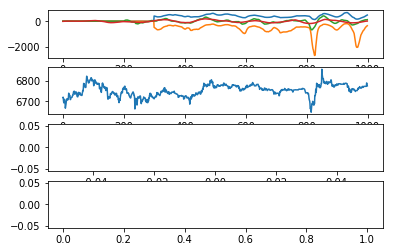

In [11]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 9))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(300, length):
    cci_absolute_edge = 500
    himax[i] = RS_F[i]*cci_absolute_edge-100#CCI105C[i]/CCI105C[i-10]-150
    lomax[i] = 1/(RS_F[i]**2.2)*-1*cci_absolute_edge
    hi = himax[i]
    lo = lomax[i]
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i]   
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]

            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
for i in range(0, len(price)-1):
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 7] = pnl[i+1]
    price[i, 8] = pnlT[i+1]
J = np.arange(1, 1000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 500, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2','pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
#print(price)
plt.show()

0.8461544461778466
1.01713815227819
251.65625
0
[1.47589327]
         1       2  time_in     time  length        CCI1        CCI2  \
0   6715.0  6742.0    400.0    446.0    46.0 -136.755677  126.925567   
1   6772.0  6757.5    494.0    747.0   253.0   82.199922   89.013112   
2   6742.5  6777.0    801.0    842.0    41.0  -51.370846  213.104006   
3   6798.5  6780.0    879.0   1039.0   160.0    6.087848  116.195768   
4   6768.0  6777.0   1064.0   1714.0   650.0   46.382972  188.028171   
5   6855.0  6848.0   1780.0   1878.0    98.0  137.149852   -5.126977   
6   6849.0  6844.0   1925.0   2418.0   493.0   72.583016  -16.157597   
7   6840.0  6737.5   2445.0   2579.0   134.0  -16.117325  -53.088818   
8   6756.5  6506.0   2670.0   2957.0   287.0  118.526579  -75.696828   
9   6522.0  6558.0   3043.0   3213.0   170.0   21.997097  174.620280   
10  6561.5  6557.5   3251.0   3344.0    93.0   16.690373   62.367581   
11  6559.0  6571.5   3387.0   3501.0   114.0   74.095416  219.709846   
12 

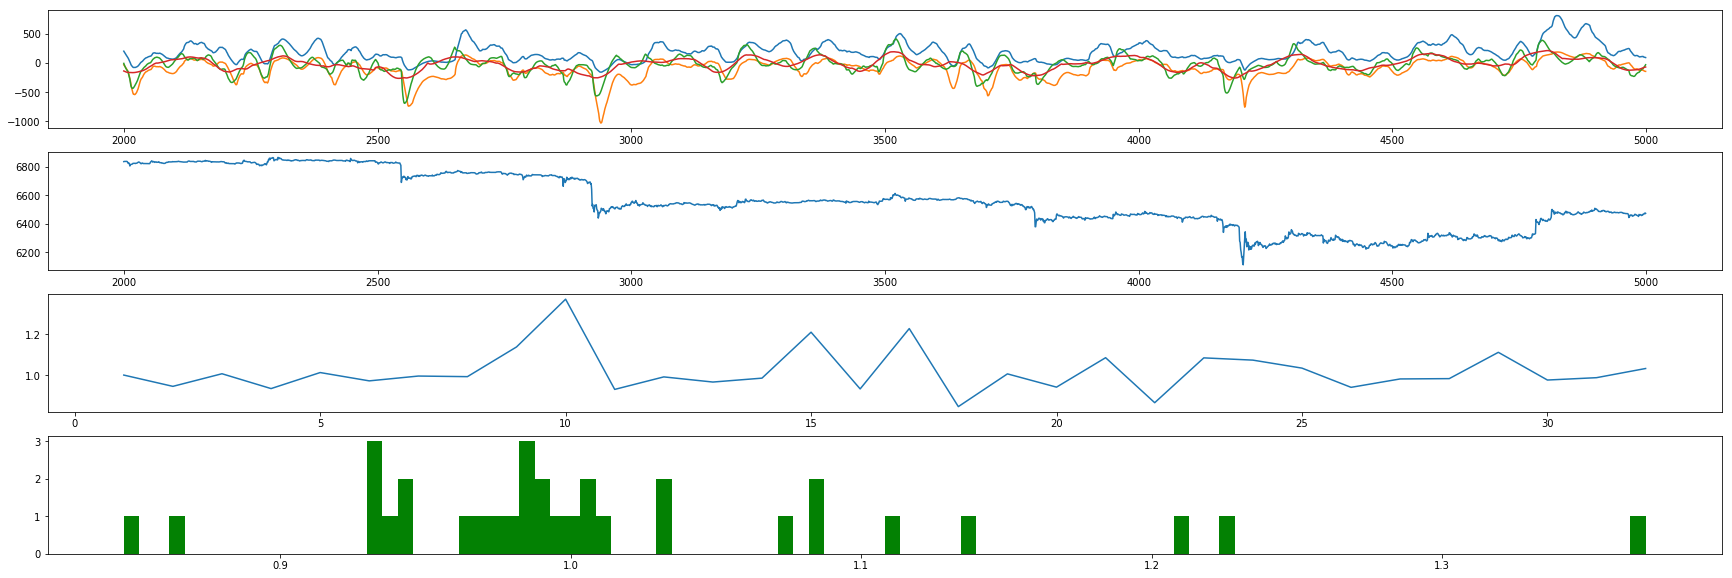

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [53]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =500
    himax[i] = RS_F[i]**1.1*cci_absolute_edge-320
    lomax[i] = 1/(RS_F[i]**1.2)*-1*cci_absolute_edge*0.8+350
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(2000,5000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
#print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

0.7572886916248552
1.0110512434190284
114.52941176470588
0
[1.44054425]
         1       2  time_in     time  length        CCI1        CCI2  \
0   6715.0  6741.0    400.0    438.0    38.0 -136.755677   43.005622   
1   6806.5  6780.0    488.0    614.0   126.0  139.636455   42.459432   
2   6765.0  6756.0    651.0    727.0    76.0  -29.498024   -5.879138   
3   6742.5  6784.0    799.0    836.0    37.0    1.579986    9.174281   
4   6795.0  6766.5    878.0    972.0    94.0   24.885615  -96.669420   
5   6768.0  6775.0   1060.0   1119.0    59.0  126.941685   40.604551   
6   6732.0  6723.0   1189.0   1235.0    46.0 -169.008543    4.506111   
7   6736.5  6735.5   1339.0   1455.0   116.0   39.507116  -67.701137   
8   6754.5  6755.0   1505.0   1596.0    91.0   54.444413   33.338741   
9   6760.0  6844.5   1671.0   1875.0   204.0  110.509288  -36.928692   
10  6848.5  6821.0   1923.0   2034.0   111.0  108.402684 -143.081887   
11  6833.0  6823.5   2124.0   2230.0   106.0   61.743842 -110.72

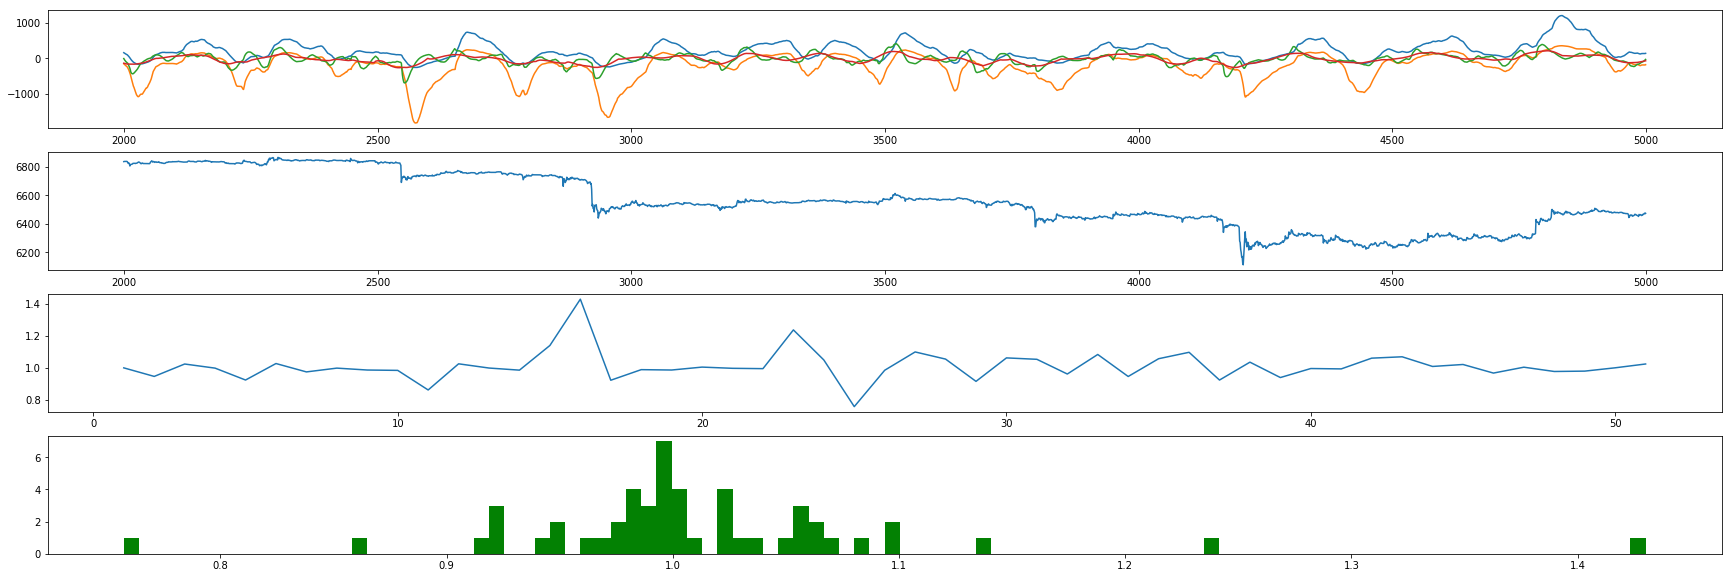

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [88]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =700
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-500
    lomax[i] = 1/(RS_F_205[i]**1.4)*-1*cci_absolute_edge+600
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(2000,5000)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


0.7005846982440617
1.1190253356800943
399.9
0
[2.26266637]
        1       2  time_in    time  length        CCI1        CCI2  \
0  6706.0  6777.0    809.0   842.0    33.0 -292.794949  213.104006   
1  6756.0  6779.5    948.0  1721.0   773.0 -286.079589  284.413733   
2  6812.0  6761.0   2013.0  2651.0   638.0 -338.121988  245.964342   
3  6722.5  6549.5   2789.0  3217.0   428.0 -238.979880  250.393323   
4  6549.0  6468.5   3676.0  3959.0   283.0 -234.330923  213.895760   
5  6452.5  6349.5   4059.0  4302.0   243.0 -251.994033  266.167925   
6  6458.5  6508.0   4968.0  5148.0   180.0 -192.058110  286.219736   
7  6618.0  6569.5   6003.0  7086.0  1083.0 -279.825351  387.742708   
8  6523.0  6441.5   7317.0  7655.0   338.0 -351.277010  268.029968   
9  6436.0  6518.0   8027.0  9935.0     0.0 -270.692508  283.709405   

     CCIReal1    CCIReal2       pnl      pnlT  
0 -181.826069   -9.613178  0.700585  0.700585  
1 -128.791242  124.925942  0.875842  0.613601  
2 -165.392231  100.824003 

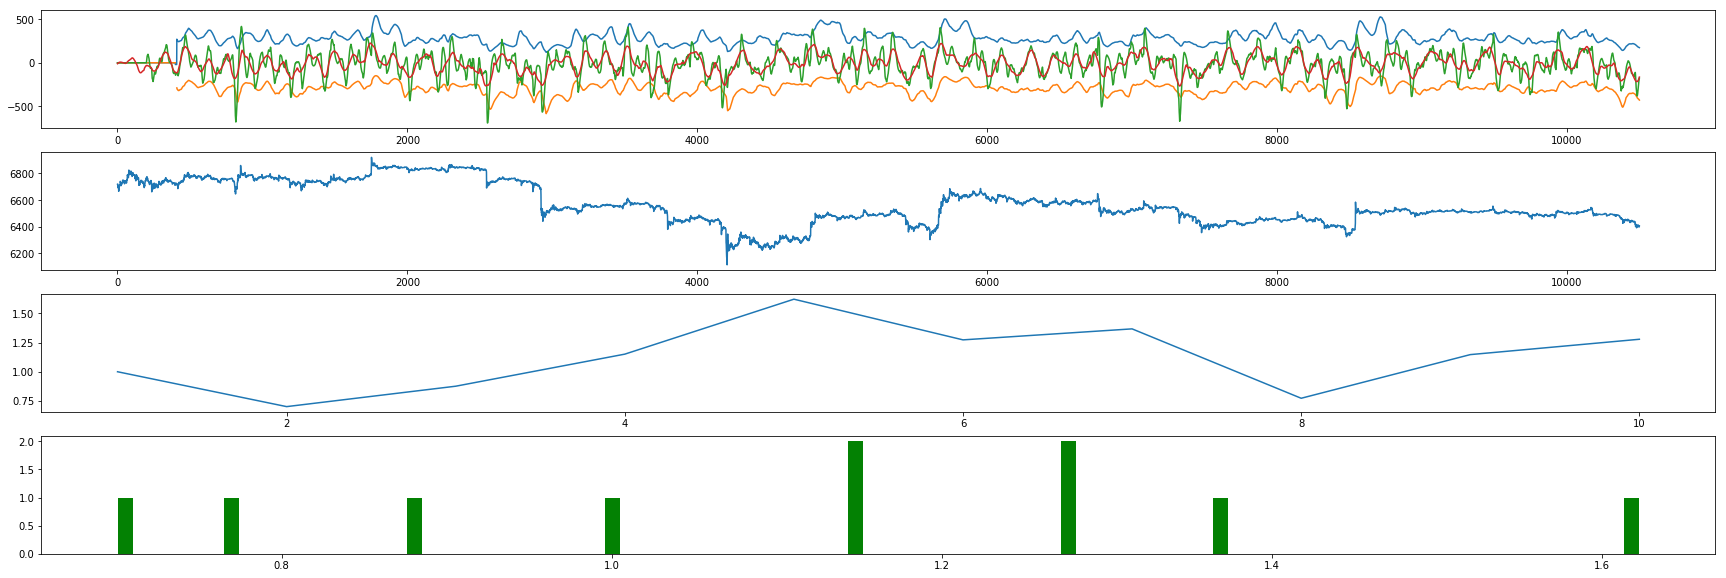

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [190]:

## Short Only ##  (Why is it backwards???)
leverage = 25

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =300
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-20
    lomax[i] = 1/(RS_F_205[i]**1.1)*-1*cci_absolute_edge+20
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


0.8119869467830384
0.9947339569617248
111.76190476190476
0
[0.71071701]
         1       2  time_in     time  length        CCI1        CCI2  \
0   6715.0  6745.5    400.0    448.0    48.0 -136.755677  148.810637   
1   6780.5  6780.5    561.0    622.0    61.0  -40.647307  136.901844   
2   6753.0  6766.5    719.0    844.0   125.0  -69.668893  255.169194   
3   6803.0  6784.5    881.0    914.0    33.0  -24.607961  100.116548   
4   6754.5  6779.5    943.0   1037.0    94.0 -173.792641   93.395825   
5   6765.0  6748.0   1077.0   1314.0   237.0 -115.562298  195.688847   
6   6749.0  6764.0   1587.0   1607.0    20.0 -146.433383  187.176682   
7   6844.5  6848.0   1868.0   1885.0    17.0  -84.616023   70.980431   
8   6847.0  6832.5   1982.0   2068.0    86.0  -14.700422   90.586350   
9   6830.5  6838.0   2084.0   2167.0    83.0  -69.722739  136.056543   
10  6848.5  6841.5   2285.0   2296.0    11.0 -185.363333  225.055740   
11  6848.0  6846.5   2340.0   2377.0    37.0  -92.889010   55.92

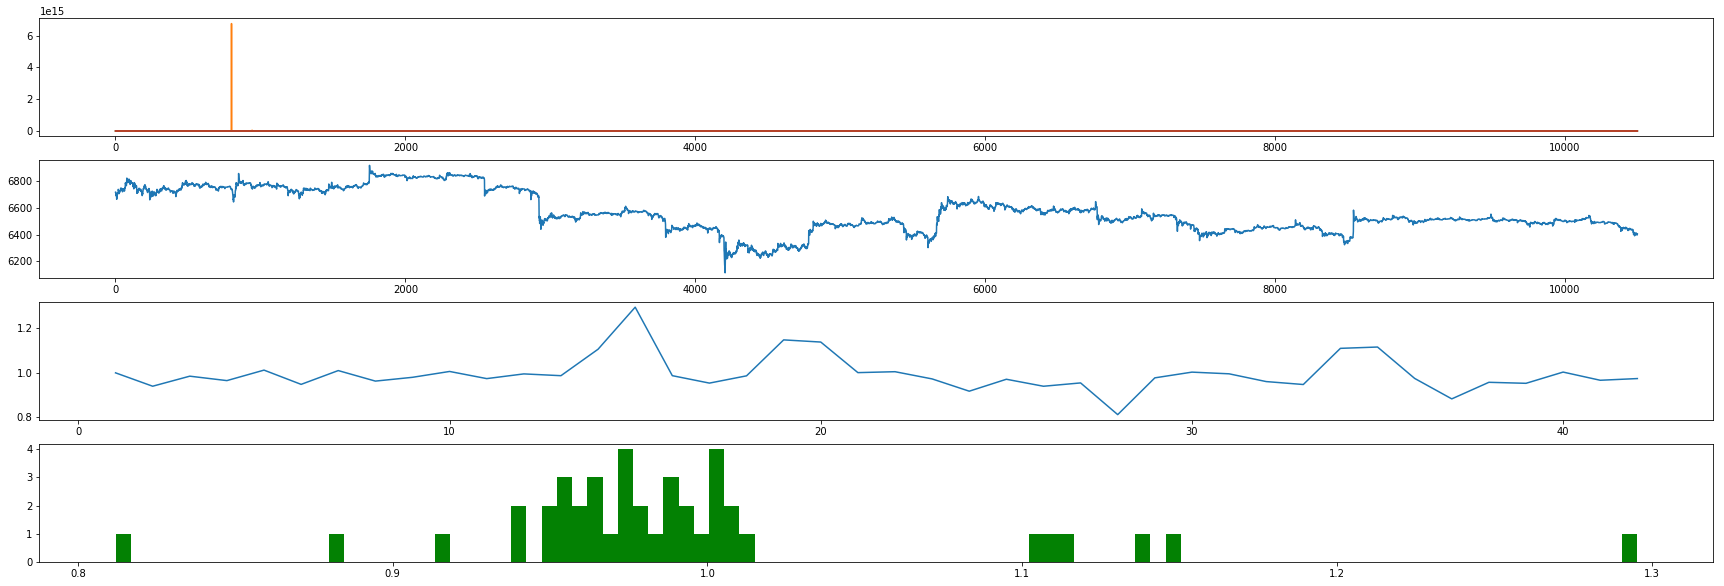

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [183]:

## Short Only ##  (Why is it backwards???)
leverage = 10

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =100
    himax[i] = RS_F_35[i]**1*cci_absolute_edge/RS_F_205[i]**2
    lomax[i] = (1/(RS_F_35[i]**5)*-1*cci_absolute_edge)*RS_F_205[i]**1
    hi = himax[i]
    lo = lomax[i]
    #hi =0
    #lo =-10
    jmax = 4
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


0.8184465273509528
1.1215937773071152
388.45454545454544
0
[2.68548104]
         1       2  time_in    time  length        CCI1        CCI2  \
0   6761.0  6777.0    661.0   842.0   181.0 -221.576094  213.104006   
1   6762.0  6779.5    949.0  1721.0   772.0 -294.977110  284.413733   
2   6838.0  6761.0   1944.0  2651.0   707.0 -158.440972  245.964342   
3   6746.5  6549.5   2773.0  3217.0   444.0 -190.116334  250.393323   
4   6551.0  6468.5   3675.0  3959.0   284.0 -196.288137  213.895760   
5   6450.0  6349.5   4058.0  4302.0   244.0 -236.752553  266.167925   
6   6470.5  6508.0   4964.0  5148.0   184.0 -120.142353  286.219736   
7   6482.5  6515.5   5305.0  5346.0    41.0 -215.441624  344.844017   
8   6615.5  6569.5   6002.0  7086.0  1084.0 -264.342694  387.742708   
9   6488.0  6441.5   7323.0  7655.0   332.0 -475.986921  268.029968   
10  6437.0  6518.0   8025.0  9935.0     0.0 -225.246113  283.709405   

      CCIReal1    CCIReal2       pnl      pnlT  
0   -56.782185   -9.613178

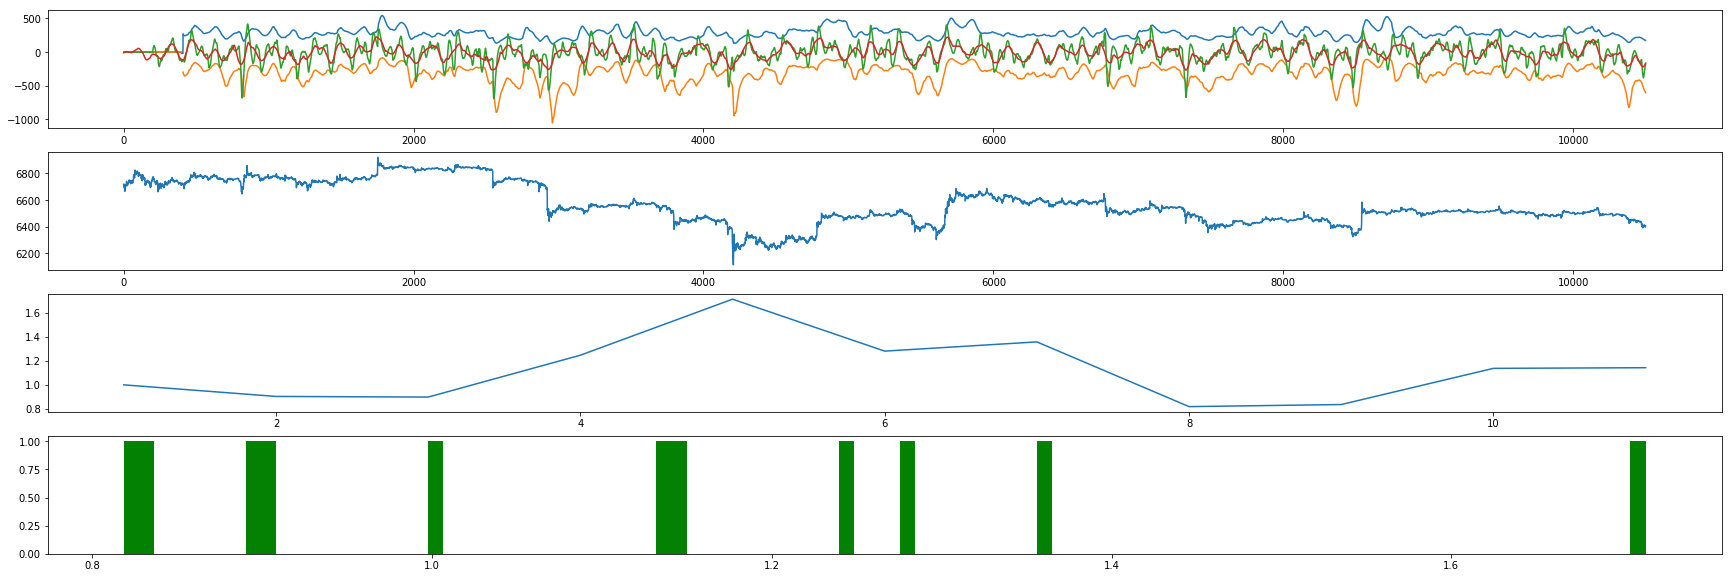

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [193]:

## Short Only ##  (Why is it backwards???)
leverage = 25

var = CCI105B
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =300
    himax[i] = RS_F_205[i]**1.2*cci_absolute_edge-20
    lomax[i] = 1/(RS_F_205[i]**2)*-1*cci_absolute_edge+20
    hi = himax[i]
    lo = lomax[i]
    #hi =100
   # lo =25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1, l)
plt.subplot(4,1,1)
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, var[J])
plt.plot(J, CCI1[J])

plt.subplot(4,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(4,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
plt.subplot(4,1,4)
n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


0.8661790813628478
1.067310747071636
88.98076923076923
0
[14.09611302]


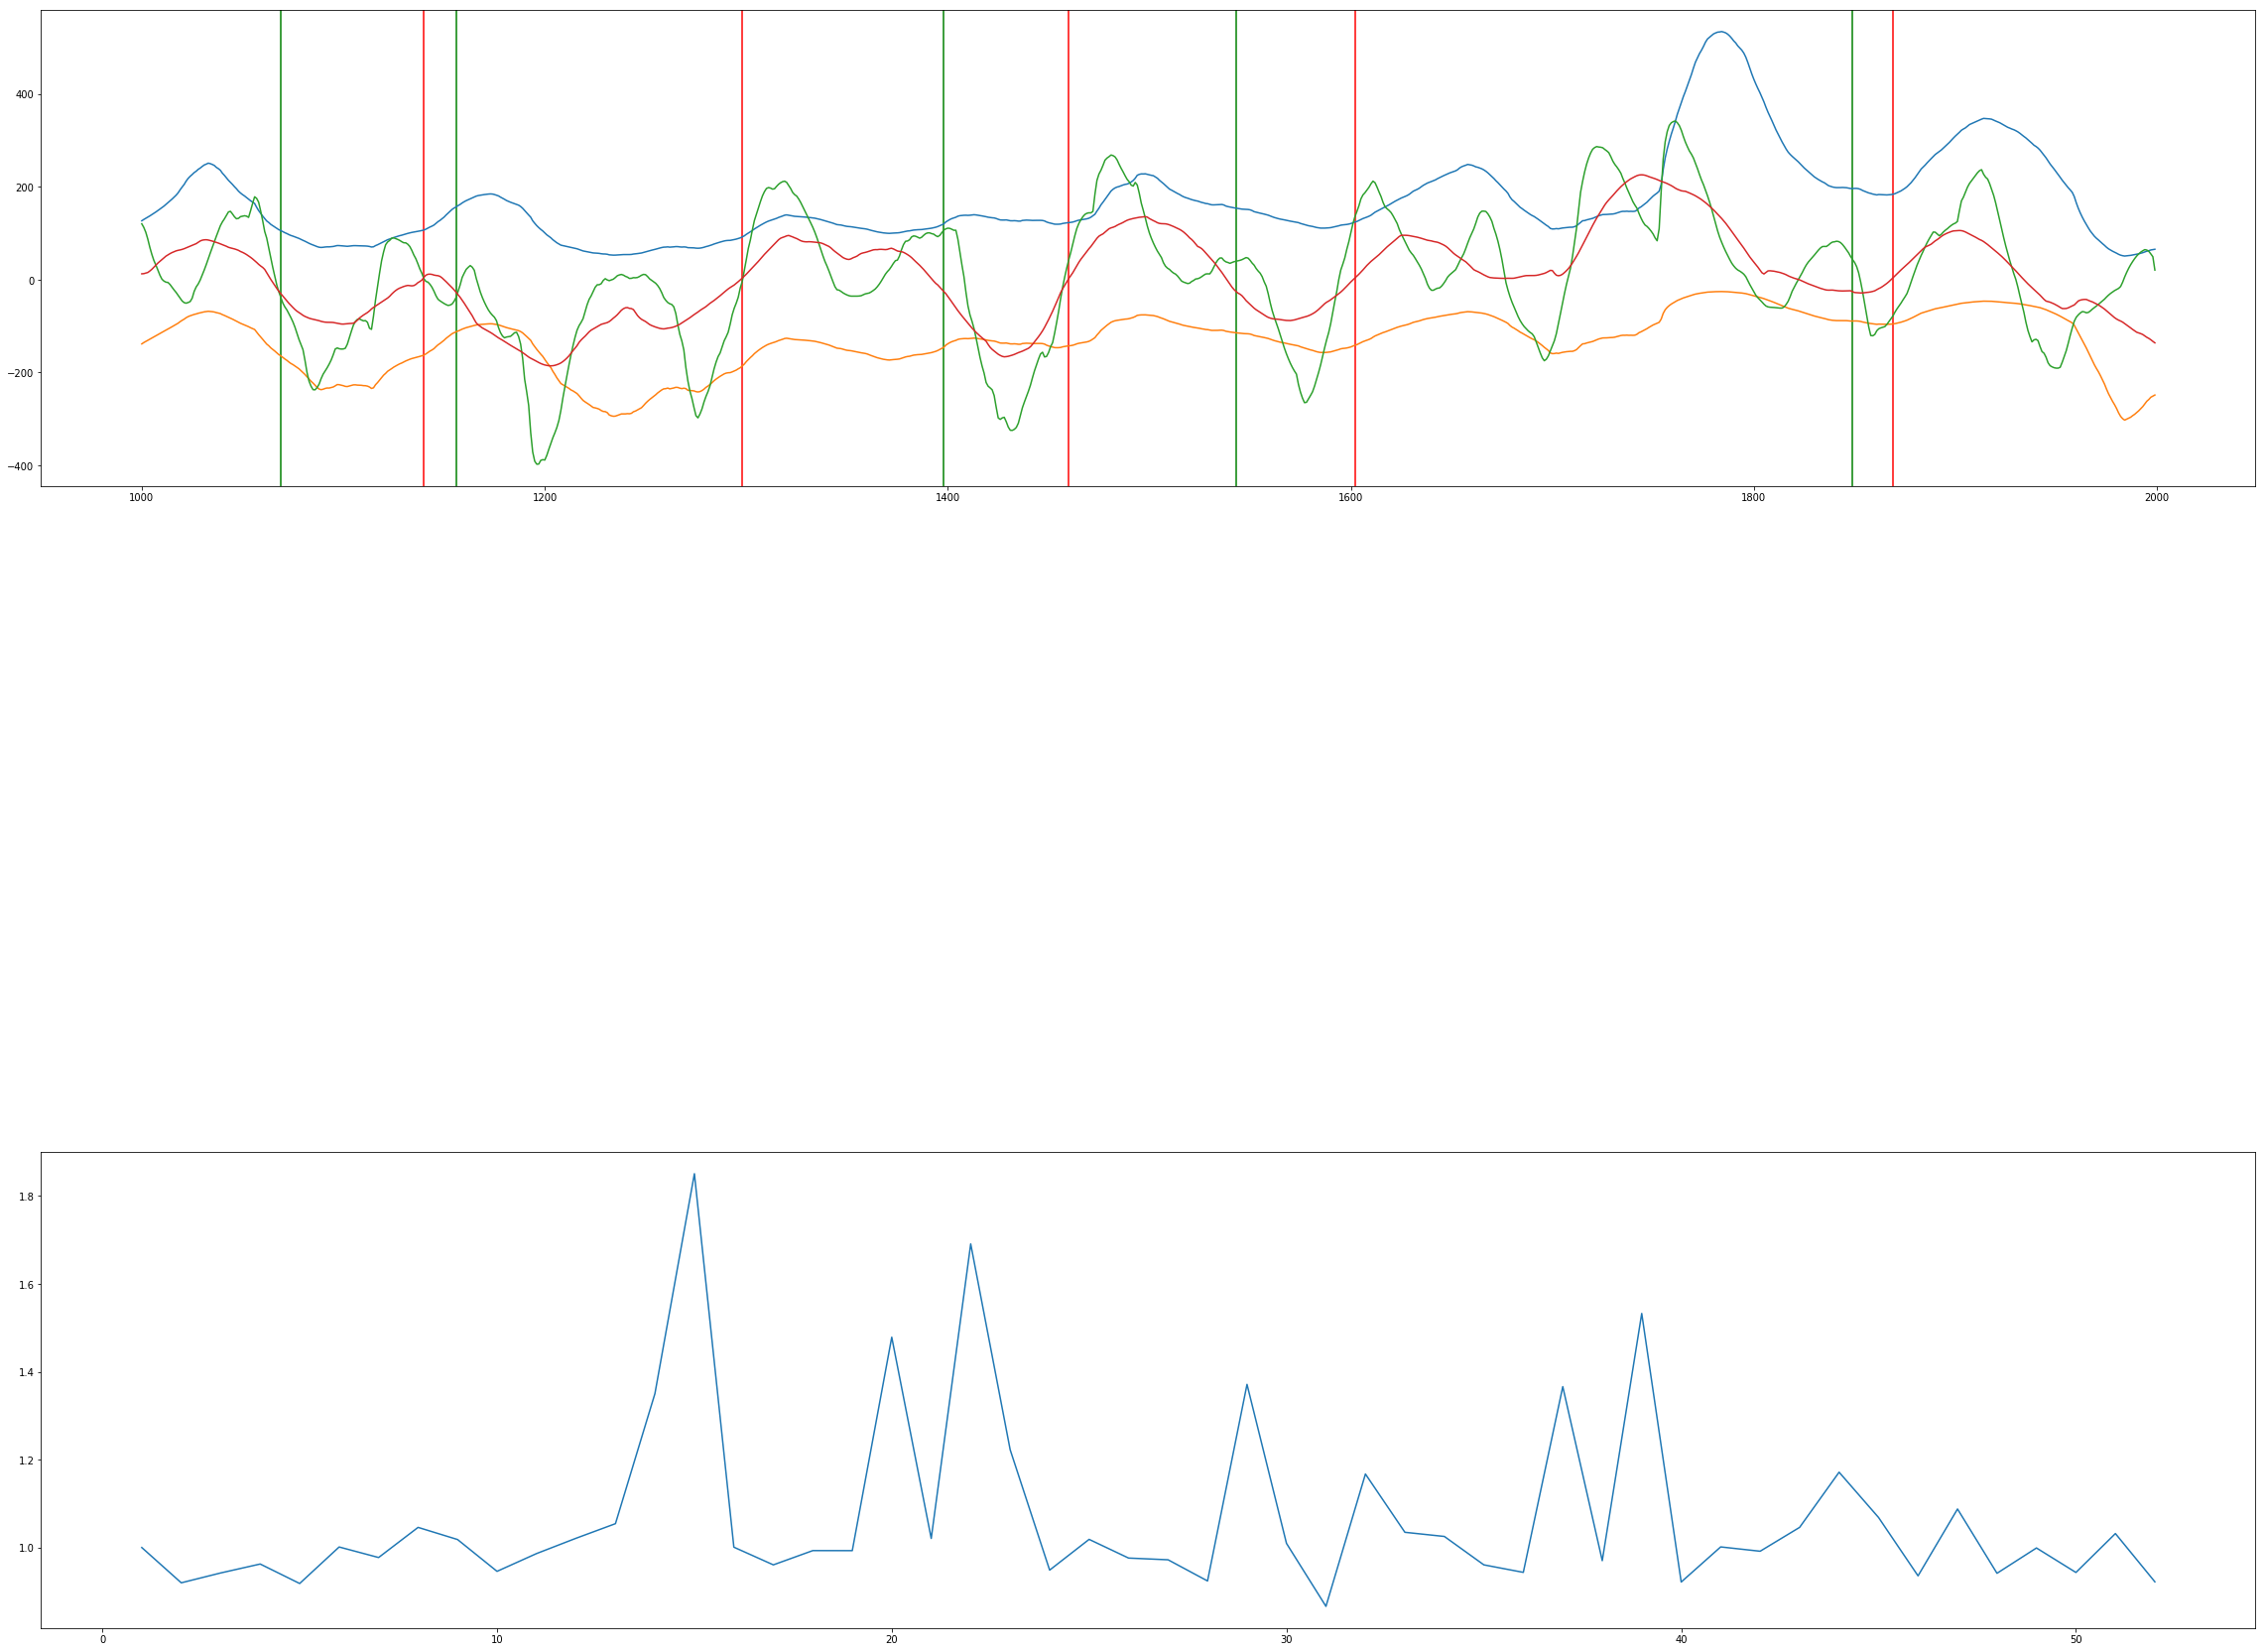

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [239]:

## Short Only ##  (Why is it backwards???)
leverage = 25

var = CCI1
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =150
    himax[i] = RS_F_205[i]**2.5*cci_absolute_edge-20
    lomax[i] = 1/(RS_F_205[i]**2.5)*-1*cci_absolute_edge+200
    #hi = himax[i]
    #lo = lomax[i]
    hi =0
    lo =-25
    jmax = 2
    
    if (var[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (var[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1000, 2000)
plt.subplot(3,1,1)
xcoords = price[5:10,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[5:10,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, CCI105B[J])
plt.plot(J, CCI1[J])

plt.subplot(2,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(3,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
#plt.subplot(4,1,4)
#n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

C:\ProgramData\Anaconda3\envs\domdecarlo\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


0.5779695319399458
0.967435786385019
140.11428571428573
0
[0.13039372]


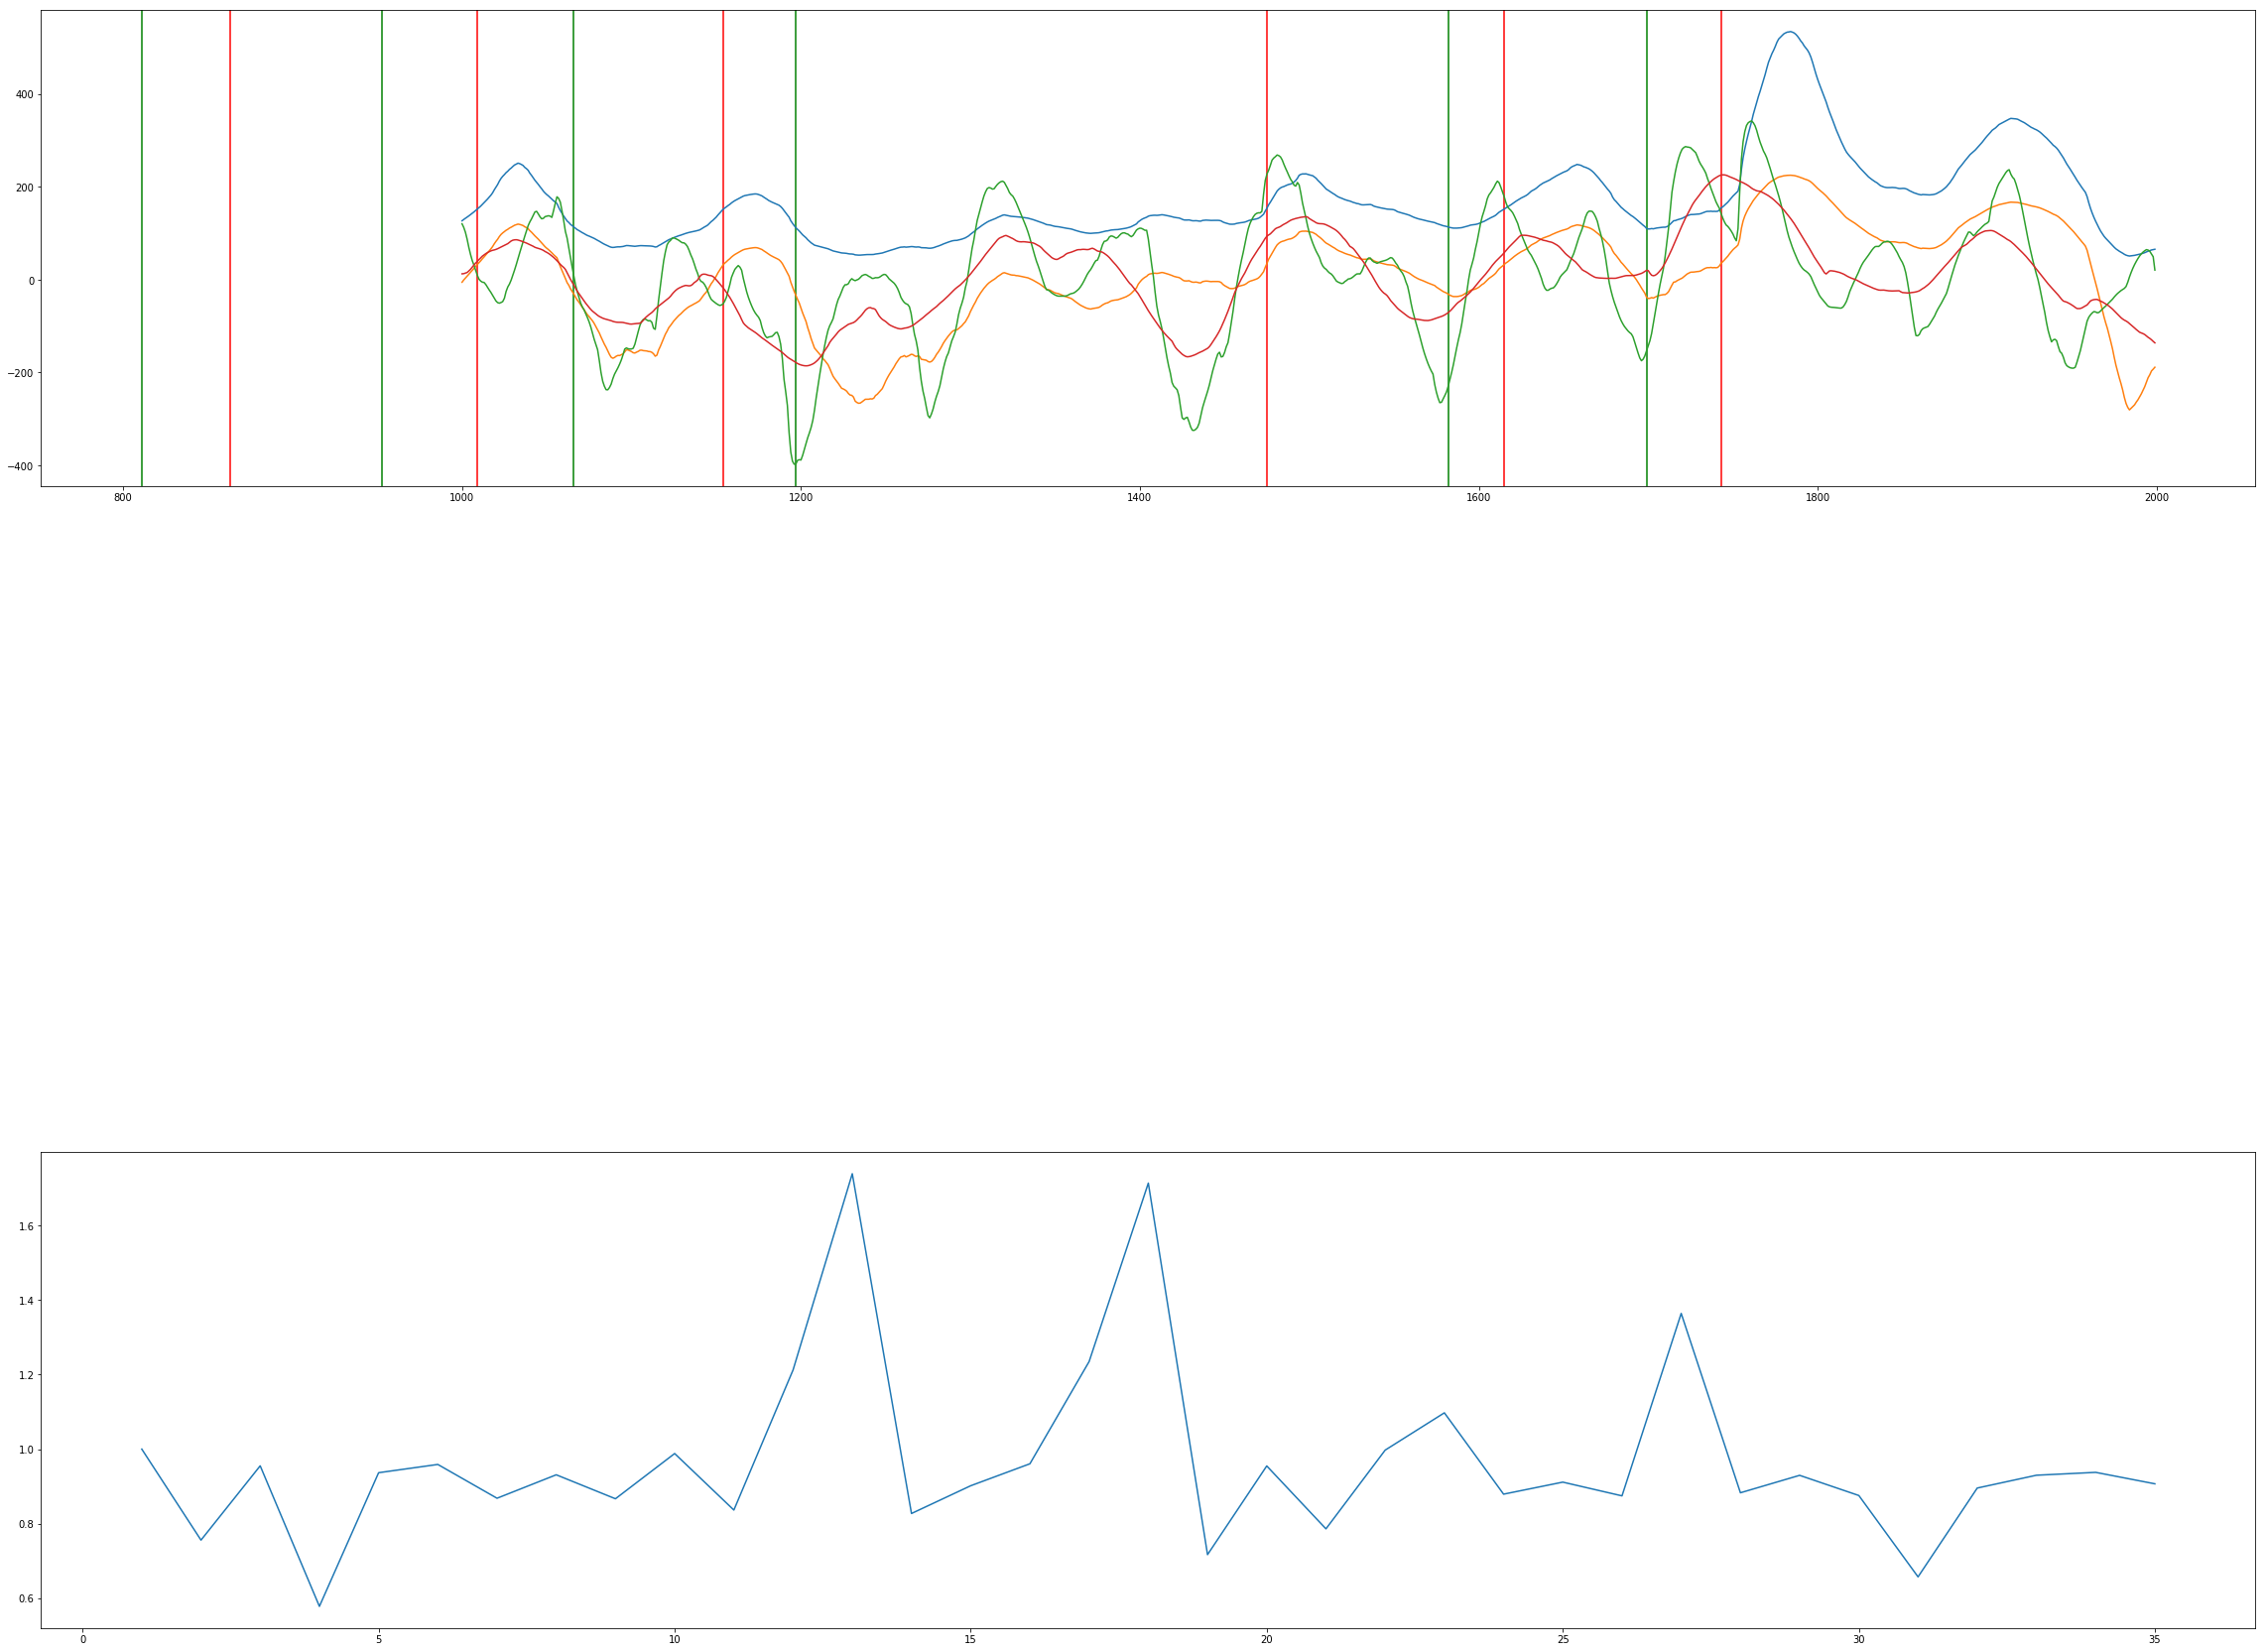

AttributeError: module 'pandas.util' has no attribute 'terminal'

In [254]:

## Short Only ##  (Why is it backwards???)
leverage = 25

var = CCI1
j = 0 #count variable
k = 0  #count variable
liq = 0  #count variable
price = np.zeros((length-cci_len, 11))
himax = pd.Series(np.zeros(l))
lomax = pd.Series(np.zeros(l))
X = 0
for i in range(400, length):
    cci_absolute_edge =150
    himax[i] = RS_F_205[i]**2.5*cci_absolute_edge-20
    lomax[i] = 1/(RS_F_205[i]**3.2)*-1*cci_absolute_edge+100*RS_F_205[i]*1.5
    #hi = himax[i]
    #lo = lomax[i]
    hi =30
    lo =-30
    jmax = 2
    
    if (lomax[i] <= lo and j == 0):
        j = 1
        price[k, 0] = close[i]
        price[k, 2] = i
        price[k, 5] = var[i] 
        price[k,7] = CCI1[i]
        
    elif j == 1 and high[i] > (1/leverage+1)*price[k,0]:
        liq +=1
        price[k, 1] = close[i]
        price[k, 3] = i
        j = 0
        k = k+1
    elif (lomax[i] >= hi) and (j>=1):
        j = j+1
        if j == jmax:
            #mat[j,k] = RSIclose[i]
            price[k, 3] = i
            price[k, 1] = close[i]
            price[k, 6] = var[i]
            price[k,8] = CCI1[i]
            k = k+1
            j = 0
   # d = 1
price = np.delete(price, np.s_[k::], 0)
pnl = np.ones(len(price))
pnlT = np.ones(len(price))
X2= abs(X-1) # part of above line 
p = 0 ##ignore
p2 = abs(p-1) #ignore
count = 0
j = range(0, len(price)-1)
j2 = np.arange(17, 21)
for i in j:
    check = (price[i,X]/price[i,X2]-1-.00075*2)*leverage
    if check > 1:
        p = 1
        p2 = abs(p-1)
    else:
        p = 0
        p2 = abs(p-1)
    pnl[i+1] = (p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage) 
    pnlT[i+1] = pnlT[i]*(p2+(price[i,X]/price[i,X2]-1-.00075*2)*leverage)
    price[i, 4] = price[i,3]-price[i,2]
    price[i, 9] = pnl[i+1]
    price[i, 10] = pnlT[i+1]
J = np.arange(1000, 2000)
plt.subplot(3,1,1)
xcoords = price[2:8,2]
for xc in xcoords:
    plt.axvline(x=xc, color = 'g')
xcoords2 = price[2:8,3]
for xc in xcoords2:
    plt.axvline(x=xc, color = 'r')
plt.plot(J, himax[J])
plt.plot(J, lomax[J])
plt.plot(J, CCI105B[J])
plt.plot(J, CCI1[J])

plt.subplot(2,1,2)
#plt.plot(range())
plt.plot(J, close[J])
#plt.plot(range(1,len(pnl)+1),pnlT, label='Boys per Time')

plt.subplot(3,1,3)
plt.plot(range(1,len(pnl)+1),pnl, label='Boys per Time')
#plt.subplot(4,1,4)
#n, bins, patches = plt.hist(pnl, 100, density=False, facecolor='g', alpha=0.99)

## change into DataFrames ##

price = pd.DataFrame(price)
price.columns = ['1', '2', 'time_in', 'time', 'length','CCI1', 'CCI2', 'CCIReal1', 'CCIReal2', 'pnl', 'pnlT' ]
print(min(pnl))
print(np.average(pnl))
print(np.average(price.iloc[:,4]))
print(liq)
print(pnlT[-1:])
#print(price)
plt.show()
pd.set_option('display.width', pd.util.terminal.get_terminal_size()[0])

In [ ]:
close[27]

In [ ]:
print(CCI)

In [ ]:
name

In [ ]:
price.loc[52, 'time']

In [ ]:
print(pd.DataFrame(CCIAli105B))

In [ ]:
4.579964*1.5759

In [ ]:
(7544/7416 - 1-.00075*2)*100

In [ ]:
price.iloc[25, 1]

In [ ]:
high[price]

In [ ]:
1+1/leverage

In [ ]:
np.where(pnlT>10)

In [ ]:
np.where(pnlT>1000)

In [ ]:
price.loc[31, 'time']

In [ ]:
d

In [ ]:
price.loc[71, 'time']

In [235]:
price[5:10,2]

array([1069., 1156., 1398., 1543., 1849.])

In [ ]:
print(RS_F)

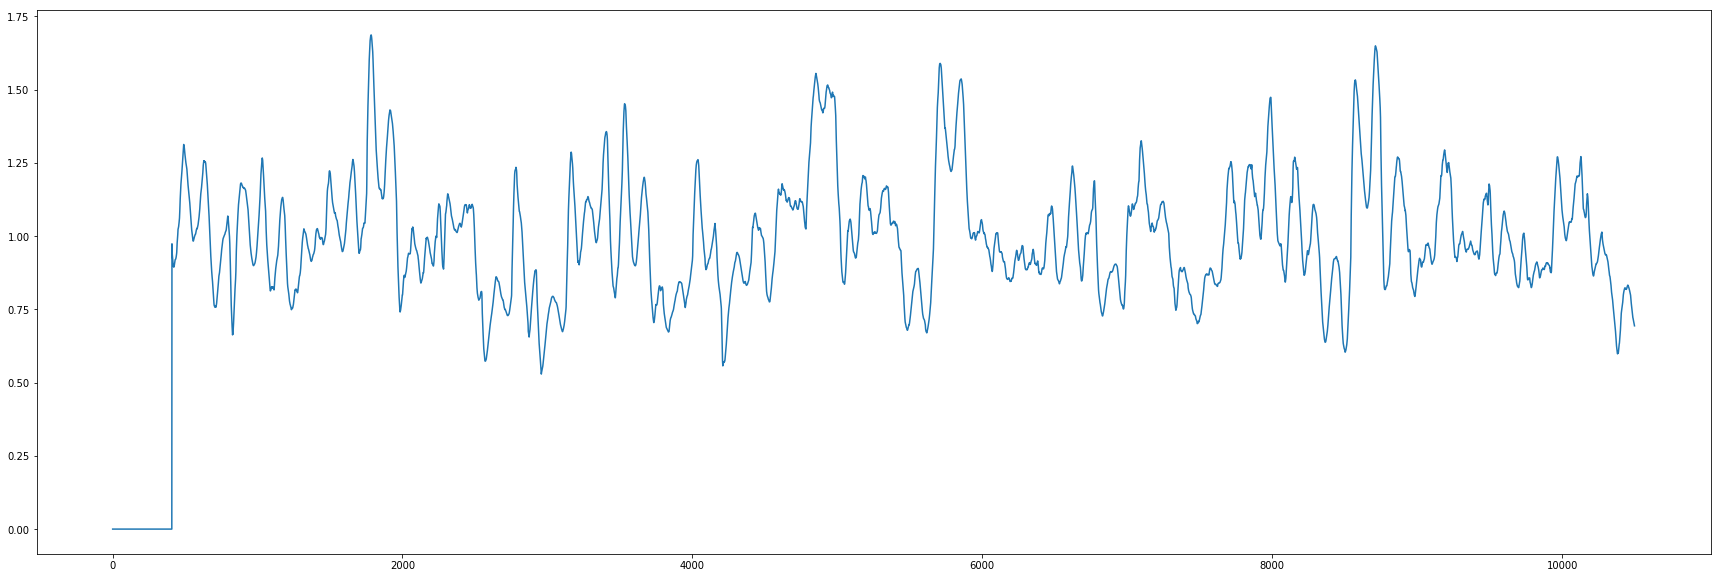

In [156]:
plt.plot(J, RS_F_205[J])

In [ ]:
name

In [ ]:
high[-1:]

In [ ]:
high[10:95]

In [5]:
## CCI and RSI init only ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCIAli = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len= 95
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCIAli[i] = CCIAli[i-1]
    else: 
        CCIAli[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCIAli, 205, 3)
time3 = pd.Series(datetime.datetime.now().timetuple())

           #print(RSIclose[i])
Mytime = (time3[5]-time2[5])
print(Mytime)

CCI105B = pd.Series(np.zeros(l))
w = 105
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,3)
        CCI105B[i] = CCI105[-1:]

9


In [10]:
CCI105B = pd.Series(np.zeros(l))
w = 105
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,3)
        CCI105B[i] = CCI105[-1:]

In [9]:
## CCI and RSI init only ##
time2=pd.Series(datetime.datetime.now().timetuple())
df1 = pd.read_csv(name)
df_all = pd.DataFrame(df1)
df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data


close = pd.Series(df_all['close'])
high = pd.Series(df_all['high'])
low = pd.Series(df_all['low'])#close values 
length = len(close)
l = length
CCIAli = pd.Series(np.zeros(l))
CCIAli106 = pd.Series(np.zeros(l))
CCIAli106B = pd.Series(np.zeros(l))
SMA = pd.Series(np.zeros(l))
madmat = pd.Series(np.zeros(l))
cci_len_25j= 25
TP = (high+low+close)/3
for i in range(cci_len, length):
    SMA[i] = TP[i-cci_len:i].sum()/cci_len
    madmat[i] = mad(TP[i-cci_len:i])
    if madmat[i] == 0:
        CCIAli[i] = CCIAli[i-1]
    else: 
        CCIAli[i] = (TP[i]-SMA[i])/(.015*madmat[i])
j = 0
k = 0
#CCIAli105 = sp.signal.savgol_filter(CCIAli, 105, 3)
CCIAli105B = sp.signal.savgol_filter(CCIAli, 205, 3)
time3 = pd.Series(datetime.datetime.now().timetuple())

           #print(RSIclose[i])
Mytime = (time3[5]-time2[5])
print(Mytime)

CCI105B = pd.Series(np.zeros(l))
w = 105
for i in range(cci_len+w, l):
    if i > cci_len+w:
        CCI105 = sp.signal.savgol_filter(CCIAli[i-w:i],w,3)
        CCI105B[i] = CCI105[-1:]

In [ ]:
J = np.arange(1000, 1200)
plt.subplot(3, 1, 1)
plt.plot(J, close[J])
plt.subplot(3, 1, 2)
#plt.plot(J, CCI1051[J])
#plt.plot(J, CCI25_1[J])
#plt.plot(J, CCI25_2[J])
plt.plot(J, CCI1[J])
#plt.plot(J, CCI105_1[J])
#plt.plot(J,CCI105B[J])
plt.plot(J,CCI2[J])
plt.plot(J,CCI105C[J])
#plt.plot(J,CCI105C[J])
#plt.plot(J, CCI25[J])
#plt.plot(J, CCI25_1[J])
#plt.subplot(3, 1, 3)
#plt.plot(J, CCI3[J])

In [ ]:
for i in range(cci_len, len(close)):
    CCIAli105[i] = sp.signal.savgol_filter(CCI[])

In [ ]:
CCI105C

In [ ]:
name = '7_Jun17.csv'
M = 7
dl(M*1440, name)

In [ ]:
name = '7_Jun16.csv'

In [ ]:
def dl(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
M = 30/5
name = '1440_30_5m_Jun7.csv'
dl5m(1440*M, name)

In [ ]:
name = '1440_5m_Jun3.csv'

In [ ]:
name = '1440_30_1m_Jun5.csv'

In [ ]:
name = '1440_7_Jun3.csv'

In [ ]:
name = '500J3.csv'

In [ ]:
def dlCCI1m(end, name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()
            csvwriter.writerows(data)
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break
                
                
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=95
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = mad(TP[i-cci_len:i])
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI105 = sp.signal.savgol_filter(CCI, 105, 4)
    CCI125 = sp.signal.savgol_filter(CCI, 105, 4)
    cci500df = pd.DataFrame(CCI)
    print(cci500df)

In [ ]:
dlshort_cci(500, '500J3_2.csv')

In [ ]:
def dl_st(name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low&startTime=2018-06-05T05%3A10%3A00.000Z"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            query['start'] += count
            #if query['start'] > num-1:
            #    break
            if len(data) < count:
                break
    df1 = pd.read_csv(name)
    df_all = pd.DataFrame(df1)
    df_all = pd.DataFrame(df_all.values[::-1], df_all.index, df_all.columns) # turn around data

    close = pd.Series(df_all['close'])
    high = pd.Series(df_all['high'])
    low = pd.Series(df_all['low'])#close values 
    l = len(close)
    CCI = pd.Series(np.zeros(l))
    SMA = pd.Series(np.zeros(l))
    madmat = pd.Series(np.zeros(l))
    cci_len=95
    TP = (high+low+close)/3
    for i in range(cci_len, len(close)):
        SMA[i] = TP[i-cci_len:i].sum()/cci_len
        madmat[i] = mad(TP[i-cci_len:i])
        CCI[i] = (TP[i]-SMA[i])/(.015*madmat[i])
    j = 0
    k = 0
    CCI_500 = sp.signal.savgol_filter(CCI, 105, 3)
    cci500df = pd.DataFrame(CCI_500)
    print(cci500df)

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
dl_starttime('boysnow.csv')

In [ ]:
def dl1m(start, end,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=1m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': start,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > end:
                break
            if len(data) < count:
                break

In [ ]:
def dl5m(num,name):
    # Create connector
    connector = bitmex.BitMEX(base_url=API_BASE)

    # Do trade history query
    path = "trade/bucketed?binSize=5m&symbol=XBTUSD&columns=symbol%2C%20timestamp%2C%20close%2C%20high%2C%20low"
    count = 500  # max API will allow
    query = {
        'reverse': 'true',
        'start': 0,
        'count': count,
        }

    csvwriter = None
    with open(name, 'w+') as f:
        while True:
            data = connector._curl_bitmex(path=path, verb="GET", query=query, timeout=5)
            if csvwriter is None:
                # csv requires dict keys
                if len(data) == 0:
                    break
                keys = sorted(data[0].keys())
                # Write to stdout
                csvwriter = csv.DictWriter(f, fieldnames=keys)
                csvwriter.writeheader()

            csvwriter.writerows(data)
            #data2 = pd.DataFrame
            query['start'] += count
            if query['start'] > num:
                break
            if len(data) < count:
                break

In [ ]:
boys_now = 1

while True:
    time.sleep(1)
    t = pd.Series(datetime.datetime.now().timetuple())
    if t[5] == 0:
        dlCCI1m(900, '1440j3_try.csv')
        
    else:
        boys_now


In [ ]:
dlshortCCI(500, '500J3_10.csv')

In [ ]:
dlCCI(1440, '1440j3_try.csv')

In [ ]:
name = '1440_30_1m_Jun7.csv'
dl1m(1440*30,1440*60, name)

In [ ]:
name = '1440_30_1m_Jun5.csv'

In [ ]:
pd.set_option('display.max_rows',6000)

In [119]:
f=0
d=0
rsi_len = 105
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
        
RS_F_105 = pd.Series(np.zeros(l))
RS_F_205 = pd.Series(np.zeros(l))
w = 105
for i in range(rsi_len+w, l):
    if i > cci_len+w:
        RSF = sp.signal.savgol_filter(RS[i-w:i],w,3)
        
        RS_F_105[i] = RSF[-1:]

In [ ]:
fil = sp.signal.savgol_filter(RSI100, 105, 3)

In [155]:
f=0
d=0
rsi_len = 205
change_close = pd.Series(np.zeros(l))
gain = pd.Series(np.zeros(l))
loss = pd.Series(np.zeros(l))
smagain = pd.Series(np.zeros(l))
smaloss = pd.Series(np.zeros(l))
RS = pd.Series(np.zeros(l))
RSI100 = pd.Series(np.zeros(l))
dRdt = pd.Series(np.zeros(l))
dR2dt = pd.Series(np.zeros(l))
for i in range(1,len(close)):   
    #print(close[i])
    change_close[i] = close[i]-close[i-1]
    if change_close[i] > 0:
        gain[i] = change_close[i]
    elif change_close[i] < 0:
        loss[i] = change_close[i]*-1
    elif change_close[i] == 0.00000:
        loss[i] = 0
        gain[i] = 0
    if i == rsi_len:   
        smagain[rsi_len] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[rsi_len] = loss[i-rsi_len:i].sum()/rsi_len
    elif i > rsi_len: 
        smagain[i] = gain[i-rsi_len:i].sum()/rsi_len
        smaloss[i] = loss[i-rsi_len:i].sum()/rsi_len
        if smaloss[i] == 0:
            RSI100[i] = 100
        else:
            RS[i] = smagain[i]/smaloss[i]
            RSI100[i] = 100 - 100/(1+RS[i])
           #print(RSIclose[i])
        
RS_F_205 = pd.Series(np.zeros(l))
w = rsi_len
for i in range(rsi_len+w, l):
    if i > cci_len+w:
        RSF = sp.signal.savgol_filter(RS[i-w:i],w,3)
        
        RS_F_205[i] = RSF[-1:]